In [1]:
!git clone https://github.com/InfraSchools/analiseDados.git

Cloning into 'analiseDados'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 163 (delta 26), reused 24 (delta 10), pack-reused 117
Receiving objects: 100% (163/163), 46.40 MiB | 16.00 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Checking out files: 100% (63/63), done.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [6]:
df = pd.read_csv("analiseDados/base/Base_Completa.csv", sep=';', encoding='utf-8', squeeze = True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df

,ID_PROVA_BRASIL,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_5EF,NU_PRESENTES_5EF,TAXA_PARTICIPACAO_5EF,NIVEL_0_LP5,NIVEL_1_LP5,NIVEL_2_LP5,NIVEL_3_LP5,NIVEL_4_LP5,NIVEL_5_LP5,NIVEL_6_LP5,NIVEL_7_LP5,NIVEL_8_LP5,NIVEL_9_LP5,NIVEL_0_MT5,NIVEL_1_MT5,NIVEL_2_MT5,NIVEL_3_MT5,NIVEL_4_MT5,NIVEL_5_MT5,NIVEL_6_MT5,NIVEL_7_MT5,NIVEL_8_MT5,NIVEL_9_MT5,NIVEL_10_MT5,NU_MATRICULADOS_CENSO_9EF,NU_PRESENTES_9EF,TAXA_PARTICIPACAO_9EF,NIVEL_0_LP9,NIVEL_1_LP9,NIVEL_2_LP9,...,TP_INDIGENA_LINGUA,CO_LINGUA_INDIGENA,IN_BRASIL_ALFABETIZADO,IN_FINAL_SEMANA,IN_FORMACAO_ALTERNANCIA,IN_MEDIACAO_PRESENCIAL,IN_MEDIACAO_SEMIPRESENCIAL,IN_MEDIACAO_EAD,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,IN_COMUM_CRECHE,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_ESP_EXCLUSIVA_CRECHE,IN_ESP_EXCLUSIVA_PRE,IN_ESP_EXCLUSIVA_FUND_AI,IN_ESP_EXCLUSIVA_FUND_AF,IN_ESP_EXCLUSIVA_MEDIO_MEDIO,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF,cod,regiao,NM_UF,Capital,NM_UF_SIGLA,MEDIA_TOTAL_5EF
0,2017,11,1100015,11024666,3,2,83.3,55.6,0.0,Grupo 2,24.0,24.0,1.000000,4.17,12.50,16.67,29.17,16.67,16.67,4.17,0.00,0.00,0.00,0.0,0.00,8.33,16.67,16.67,33.33,20.83,4.17,0.00,0.00,0.00,18.0,16.0,0.888889,0.00,25.00,18.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,224.05
1,2017,11,1100015,11024682,2,1,94.2,64.1,0.0,Grupo 3,148.0,146.0,0.986486,0.00,1.35,3.38,12.16,15.53,25.96,15.36,13.84,8.99,3.43,0.0,0.00,2.71,8.12,12.93,21.05,22.37,15.16,12.63,2.86,2.18,0.0,0.0,0.000000,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,256.25
2,2017,11,1100015,11024828,3,1,100.0,55.6,0.0,Grupo 3,19.0,18.0,0.947368,5.56,27.78,5.56,33.33,11.11,0.00,16.67,0.00,0.00,0.00,0.0,5.56,16.67,22.22,27.78,16.67,11.11,0.00,0.00,0.00,0.00,17.0,17.0,1.000000,5.88,11.76,35.29,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,202.24
3,2017,11,1100015,11024968,2,1,0.0,48.9,77.1,Grupo 3,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.0,83.0,0.965116,9.65,12.86,15.15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,0.00
4,2017,11,1100015,11025077,3,1,100.0,55.6,0.0,0,18.0,16.0,0.888889,6.25,12.50,25.00,18.75,6.25,12.50,6.25,6.25,6.25,0.00,12.5,6.25,25.00,12.50,0.00,25.00,6.25,6.25,6.25,0.00,0.00,11.0,10.0,0.909091,10.00,10.00,30.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,201.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73669,2017,53,6311029,61235125,4,1,65.8,72.2,83.3,Grupo 6,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
# [x for x in df.columns]

In [0]:
df = df[df.TAXA_PARTICIPACAO_5EF!=0]



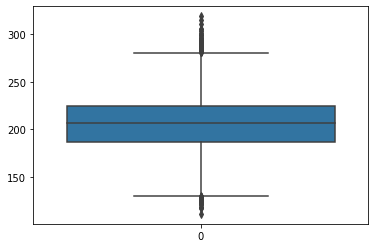

In [30]:

sns.boxplot(data=df['MEDIA_5EF_LP'])

In [51]:
""" treinamento """

q1 = df['MEDIA_5EF_LP'].quantile(q=0.25)
q4 = df['MEDIA_5EF_LP'].quantile(q=0.75)

df1Q = df[df['MEDIA_5EF_LP']<q1]
df4Q = df[df['MEDIA_5EF_LP']>q4]

df1Q['ROTULO'] = 0
df4Q['ROTULO'] = 1

treino_base_LP = pd.concat([df4Q , df1Q])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
X = treino_base_LP[[ 'IN_LABORATORIO_INFORMATICA','IN_BIBLIOTECA', 'IN_AGUA_FILTRADA', 'IN_ENERGIA_REDE_PUBLICA','IN_AGUA_INEXISTENTE','IN_ESGOTO_INEXISTENTE','IN_QUADRA_ESPORTES', 'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA', 'IN_INTERNET']]

y = treino_base_LP['ROTULO']

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [60]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1786  549]
 [ 545 1896]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2335
           1       0.78      0.78      0.78      2441

    accuracy                           0.77      4776
   macro avg       0.77      0.77      0.77      4776
weighted avg       0.77      0.77      0.77      4776



In [63]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1786  549]
 [ 545 1896]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2335
           1       0.78      0.78      0.78      2441

    accuracy                           0.77      4776
   macro avg       0.77      0.77      0.77      4776
weighted avg       0.77      0.77      0.77      4776



In [66]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1433  902]
 [ 432 2009]]
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      2335
           1       0.69      0.82      0.75      2441

    accuracy                           0.72      4776
   macro avg       0.73      0.72      0.72      4776
weighted avg       0.73      0.72      0.72      4776

